<a href="https://colab.research.google.com/github/deburg0/micrograd/blob/master/trace_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# brew install graphviz
!pip install graphviz
!pip install micrograd
from graphviz import Digraph
from micrograd.engine import Value

In [7]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

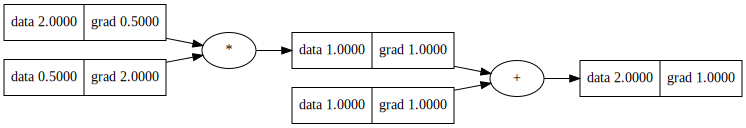

In [25]:
# a very simple example
x = Value(0.5)
y = (2*x + 1)
y.backward()
draw_dot(y)

In [26]:
x.data

0.5

In [27]:
# dy_dx
ϵ = 0.0001
x += ϵ

y1 = (2*x + 1)

dy_dx = (y1-y)/ϵ

print(f"dy_dx = {dy_dx.data:.2f}")


dy_dx = 2.00


In [36]:
for child in y._prev:
    print(child)

Value(data=1.0, grad=1)
Value(data=1, grad=1)


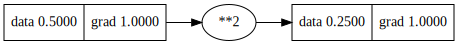

In [37]:
x = Value(0.5)
y = x**2
y.backward()
draw_dot(y)

In [ ]:
# a simple 2D neuron
import random
from micrograd import nn

random.seed(1337)
n = nn.Neuron(2)
x = [Value(1.0), Value(-2.0)]
y = n(x)
y.backward()

dot = draw_dot(y)
dot

In [ ]:
dot.render('gout')